In [4]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [5]:
mpl.__version__

'3.6.2'

In [6]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [7]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [8]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [9]:
plt.style.use("../matplotlib_style.txt")

# Fig S6 : Isolated subcorpora in the PubMed embeddings

## Import

In [16]:
tsne_tfidf_reparsed = np.load(variables_path / "tsne_tfidf_reparsed.npy")

In [17]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [18]:
tsne_bert = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

In [19]:
mask_covid_2 = np.load(variables_path / "mask_covid_2.npy")

In [20]:
mask_hiv = np.load(variables_path / "mask_hiv.npy")

In [21]:
mask_meta_analysis = np.load(variables_path / "mask_meta_analysis.npy")

## Plot

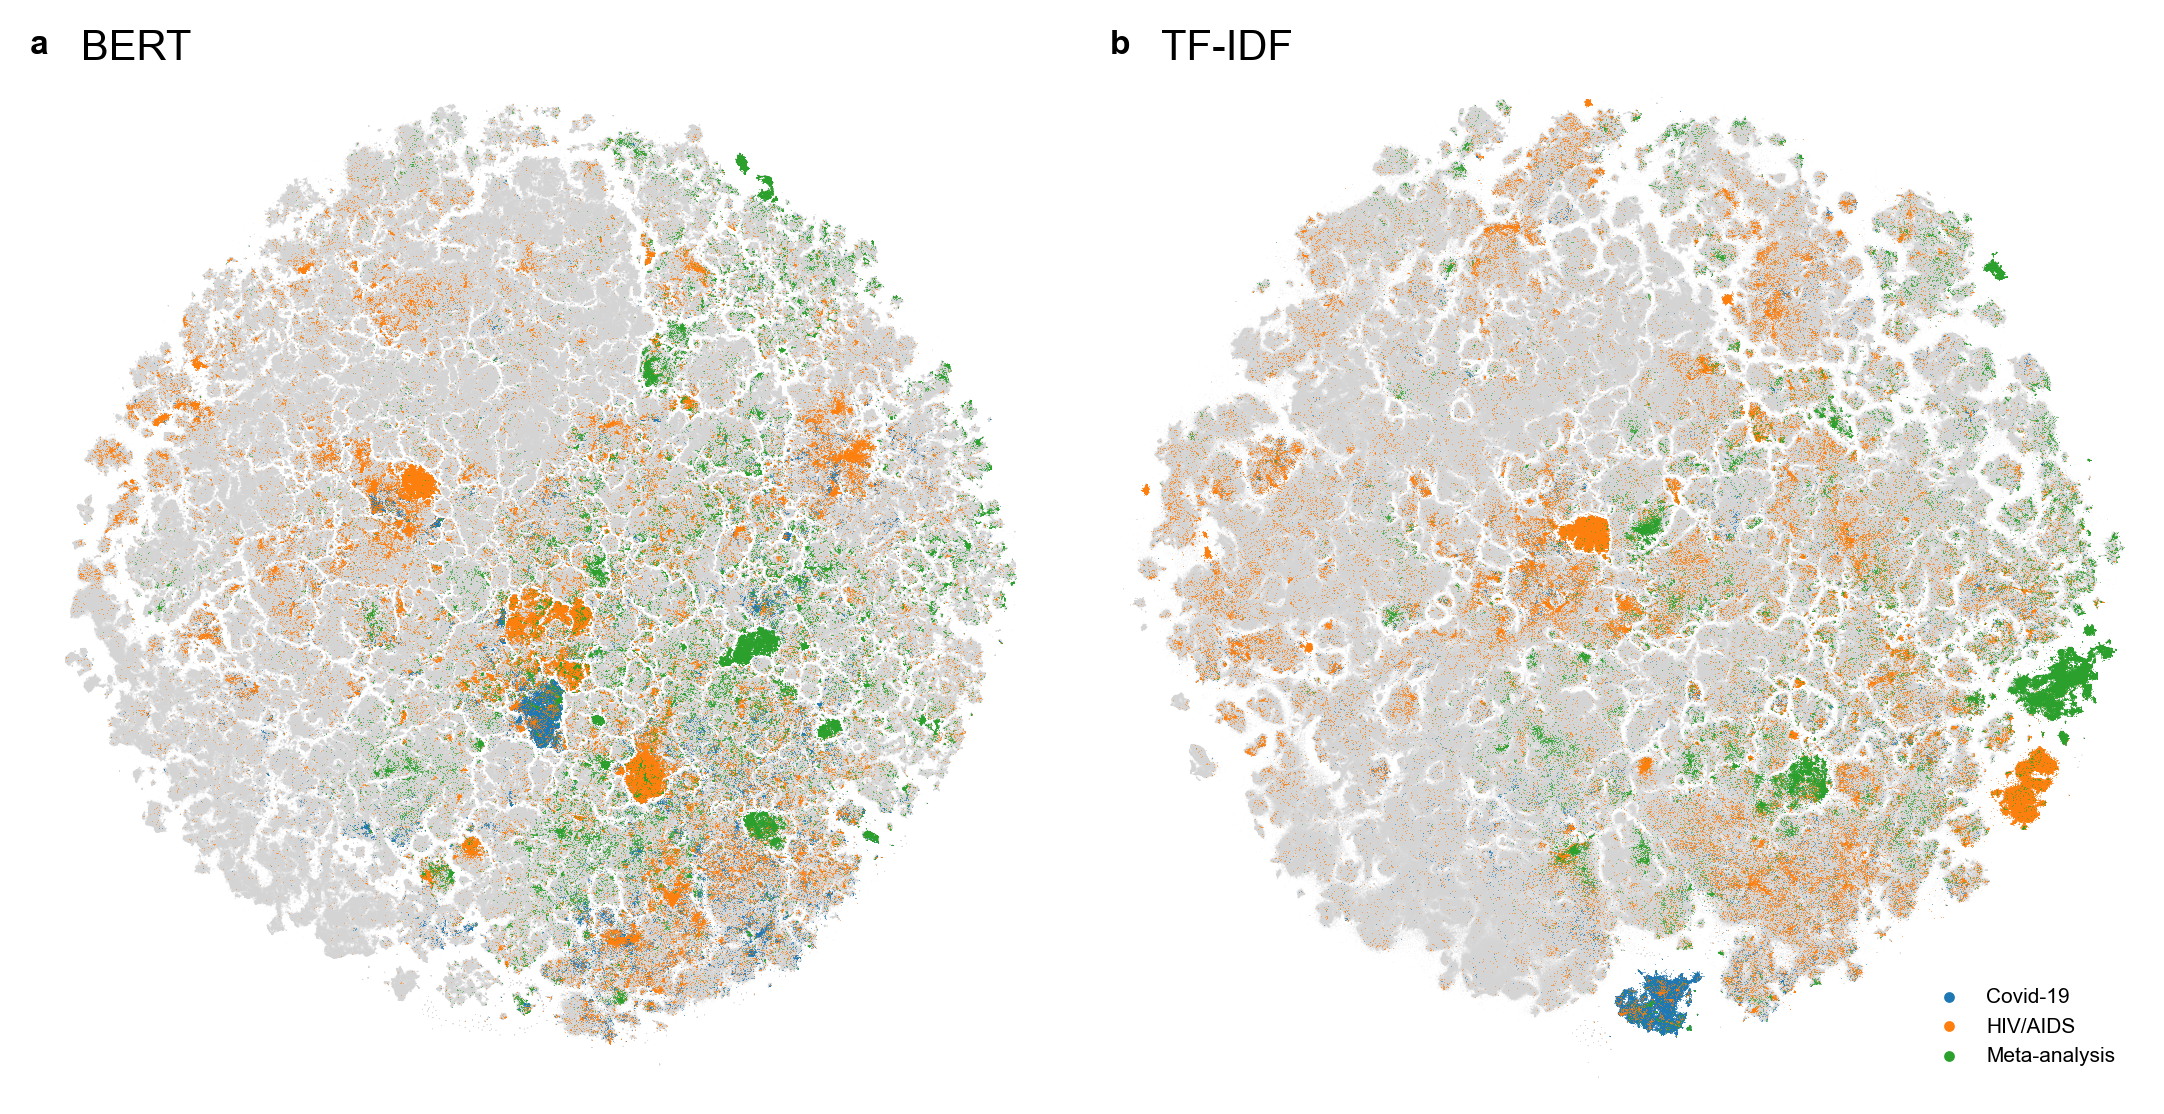

In [22]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(7.2, 3.6), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")


s_grey = 0.2
alpha_grey = 0.2
s_color = 0.2
alpha_color = 0.5

masks = [mask_covid_2, mask_hiv, mask_meta_analysis]
words = ["Covid-19", "HIV/AIDS", "Meta-analysis"]
colors = ["tab:blue", "tab:orange", "tab:green"]

# subplot a
x_lim = (-240, 240)
y_lim = (-240, 240)
ax[0].scatter(
    tsne_bert[:, 0],
    tsne_bert[:, 1],
    c="lightgrey",
    s=s_grey,
    alpha=alpha_grey,
    linewidths=0,
    ec="None",
    rasterized=True,
)
for i, mask in enumerate(masks):
    tsne = tsne_bert
    subregion = tsne[mask]
    ax[0].scatter(
        subregion[:, 0],
        subregion[:, 1],
        c=colors[i],
        s=s_color,
        alpha=alpha_color,
        marker=".",
        linewidths=0,
        rasterized=True,
    )
    ax[0].scatter([], [], c=colors[i], s=10, alpha=1, label=words[i])

ax[0].text(0.05, 1.03, "BERT", transform=ax[0].transAxes, va="top", ha="left")
ax[0].text(
    0, 1.03, string.ascii_lowercase[0], transform=ax[0].transAxes, **txtkwargs
)
ax[0].axis("scaled")
ax[0].set_xlim(x_lim[0], x_lim[1])
ax[0].set_ylim(y_lim[0], y_lim[1])
ax[0].axis("off")

# subplot b
x_lim = (-210, 210)
y_lim = (-210, 210)
ax[1].scatter(
    tsne_tfidf_reparsed[:, 0],
    tsne_tfidf_reparsed[:, 1],
    c="lightgrey",
    s=s_grey,
    alpha=alpha_grey,
    linewidths=0,
    ec="None",
    rasterized=True,
)
for i, mask in enumerate(masks):
    tsne = tsne_tfidf_reparsed
    subregion = tsne[mask]
    ax[1].scatter(
        subregion[:, 0],
        subregion[:, 1],
        c=colors[i],
        s=s_color,
        alpha=alpha_color,
        marker=".",
        linewidths=0,
        rasterized=True,
    )
    ax[1].scatter([], [], c=colors[i], s=10, alpha=1, label=words[i])

ax[1].text(
    0.05, 1.03, "TF-IDF", transform=ax[1].transAxes, va="top", ha="left"
)
ax[1].text(
    0, 1.03, string.ascii_lowercase[1], transform=ax[1].transAxes, **txtkwargs
)
ax[1].legend(loc="lower right")
ax[1].axis("scaled")
ax[1].set_xlim(x_lim[0], x_lim[1])
ax[1].set_ylim(y_lim[0], y_lim[1])
ax[1].axis("off")


fig.savefig(figures_path / "fig_S6_embeddings_and_subregions.png", dpi=300)
fig.savefig(figures_path / "fig_S6_embeddings_and_subregions.pdf", dpi=300)